# Задание 1

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors 
from matplotlib import pyplot
import numpy as np

/home/nikita/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


###  Генерируем выборку размера 100 с 2 признаками и 4 классами  


In [2]:
sample = datasets.make_classification(n_samples=100,
                                      n_features=2, 
                                      n_informative=2, 
                                      n_redundant=0,
                                      n_classes=4, 
                                      n_clusters_per_class=1, 
                                      shuffle=True,
                                      random_state=1)

### Визуализируем разделяющие поверхности для k = 1, 2, 3, 4, 5

In [3]:
colors = ListedColormap(['red', 'blue', 'yellow', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 
                               'lightyellow', 'lightgreen'])

def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), 
                       np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, 
                          test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), 
                                        yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, 
                   s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(
        train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, 
                   s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(
        test_labels,estimator.predict(test_data))))
    pyplot.show()

### Разделим данные: обучающая выборка составляет 0.3 от всей

In [4]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(
                                        sample[0], sample[1],
                                        test_size = 0.3, random_state = 1)

AMOUNT OF NEIGHBORS = 1


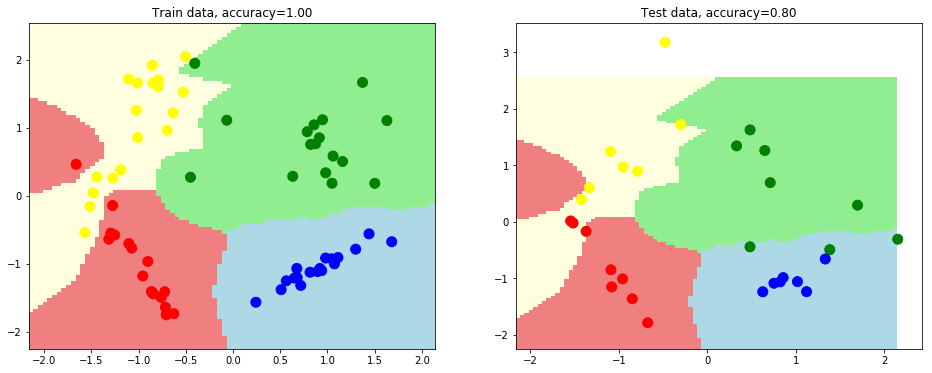

AMOUNT OF NEIGHBORS = 2


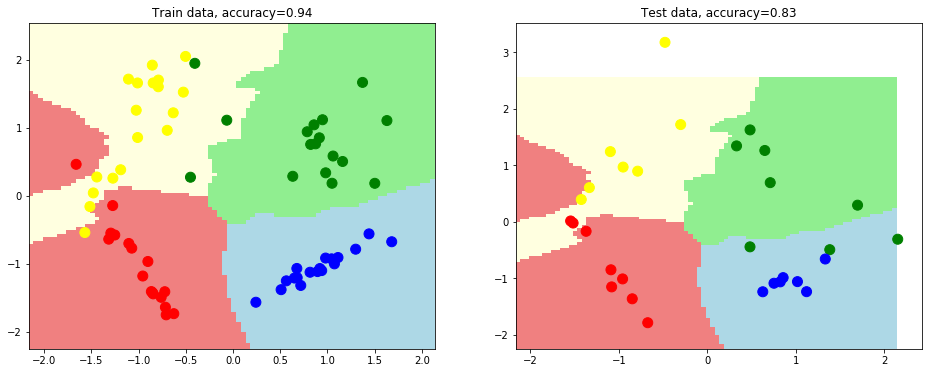

AMOUNT OF NEIGHBORS = 3


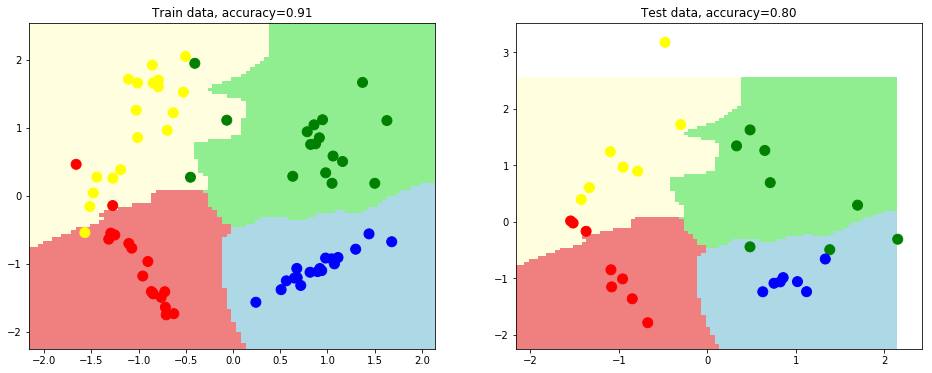

AMOUNT OF NEIGHBORS = 4


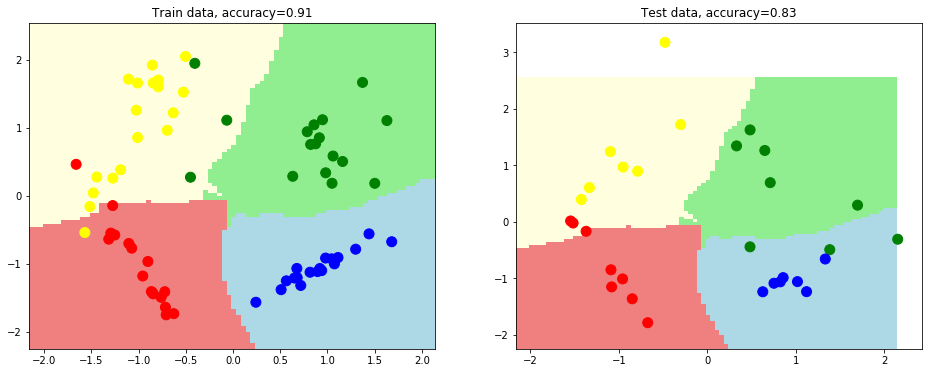

AMOUNT OF NEIGHBORS = 5


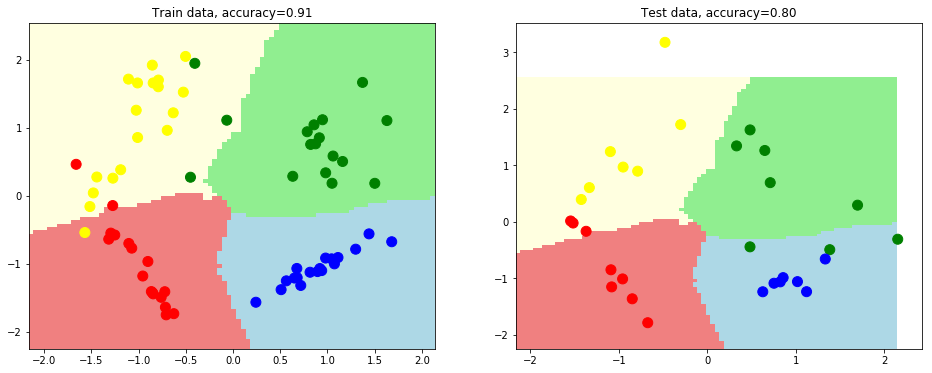

In [5]:
for i in range(1, 6):
    print("AMOUNT OF NEIGHBORS = " + str(i))
    estimator = neighbors.KNeighborsClassifier(n_neighbors=i)
    plot_decision_surface(estimator, train_data, train_labels, 
                          test_data, test_labels)

### Попробуем подобрать оптимальное k с помощью 5-fold cross-validation

In [6]:
from sklearn.cross_validation import cross_val_score

accuracy = []
k = range(1, 51)

for i in range(1, 51):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, sample[0], sample[1], 
                             cv=5, scoring='accuracy')
    accuracy.append(scores.mean())

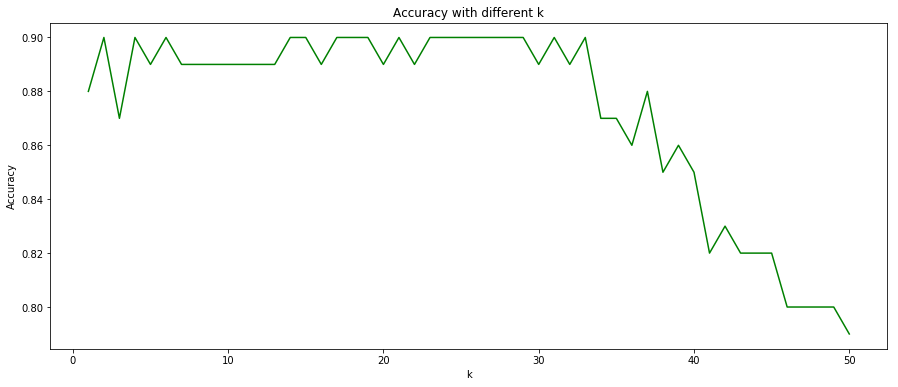

In [8]:
pyplot.figure(figsize=(15, 6))
pyplot.plot(k, accuracy, c='g')
pyplot.title("Accuracy with different k")
pyplot.xlabel('k')
pyplot.ylabel('Accuracy')
pyplot.show()

In [27]:
accuracy[5]

0.90000000000000002